In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import BatchNormalization,Dense, Reshape, Dropout # type: ignore
from tensorflow.keras.regularizers import l2
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import pydot
from tensorflow.keras.utils import model_to_dot, plot_model
from IPython.display import SVG


### 偏振态数据

In [3]:
subfolder = 'datasets'
file_path = os.path.join(subfolder, 'polar_dataset.csv')
loaded_data = np.loadtxt(file_path, delimiter=',')
y_point=4
sop_loaded = loaded_data[:, :y_point]
Isop_loaded = loaded_data[:, y_point:]

In [4]:
#train, validation and test sets division
alpha=0.7
beta=0.8
inputs_all =Isop_loaded
targets_all=sop_loaded
N=len(inputs_all)
inputs_train=inputs_all[0:int(N*alpha)]
targets_train=targets_all[0:int(N*alpha)]
inputs_val=inputs_all[int(N*alpha):int(N*beta)]
targets_val=targets_all[int(N*alpha):int(N*beta)]
inputs_test=inputs_all[int(N*beta):]
targets_test=targets_all[int(N*beta):]

np.random.seed(13)
np.random.shuffle(inputs_train)
np.random.seed(13)
np.random.shuffle(targets_train)

np.random.seed(14)
np.random.shuffle(inputs_val)
np.random.seed(14)
np.random.shuffle(targets_val)

np.random.seed(15)
np.random.shuffle(inputs_test)
np.random.seed(15)
np.random.shuffle(targets_test)

### 偏振态训练

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3711 - val_loss: 0.3130 - learning_rate: 0.0010
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2610 - val_loss: 0.3056 - learning_rate: 0.0010
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2107 - val_loss: 0.2984 - learning_rate: 0.0010
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1870 - val_loss: 0.2957 - learning_rate: 0.0010
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1710 - val_loss: 0.2907 - learning_rate: 0.0010
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1555 - val_loss: 0.2901 - learning_rate: 0.0010
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1509 - val_loss: 0.2842 - learning_rate: 0.0010
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1379 - val_loss: 0.2771 - learning_rate: 0.0010
Epoch 9/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1305 - val_loss: 0.2626 - learning_rate: 0.0010
Epoch 10/1

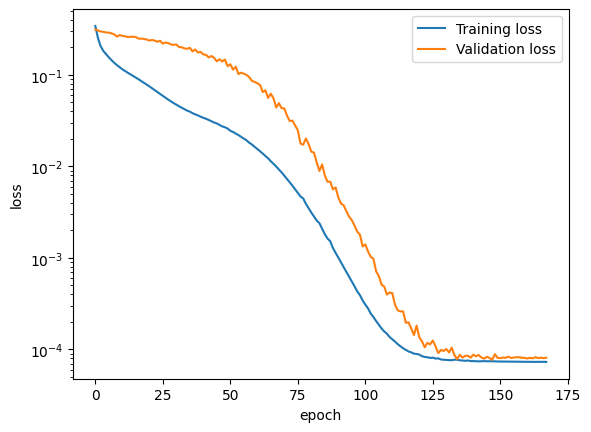

In [21]:

model = Sequential()
model.add(Dense(20, input_dim=16, activation='tanh'))
model.add(Dense(4))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

history = model.fit(inputs_train, targets_train, epochs=1000, batch_size=32, validation_data=(inputs_val, targets_val),
                    callbacks=[early_stopping, lr_scheduler])
mse = model.evaluate(inputs_val, targets_val)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

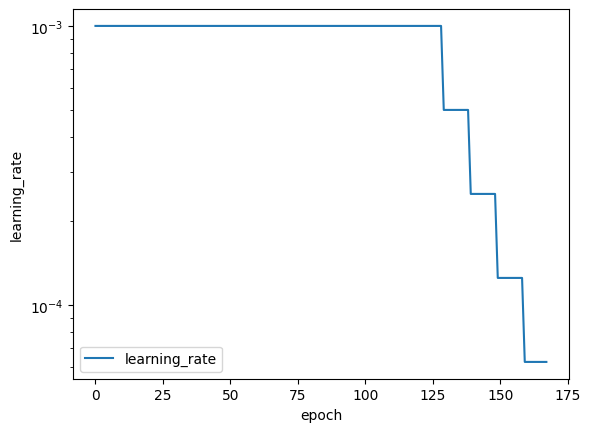

In [27]:
plt.plot(history.history['learning_rate'], label='learning_rate')
plt.yscale('log')
plt.ylabel("learning_rate")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [24]:
# Save the trained model
# model.save('polar_valloss_8.24-5model_20250217.keras')
combined_data = np.column_stack((history.history['loss'], history.history['val_loss'],history.history['learning_rate']))
np.savetxt('polartrain_valloss_learningrate.csv', combined_data, delimiter=',')

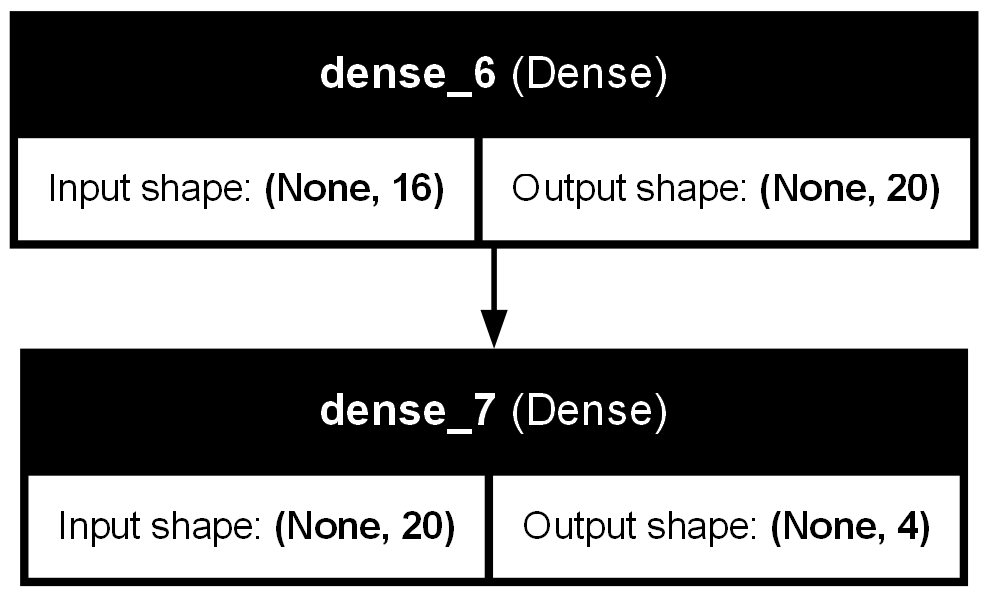

In [ ]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
# 显示 SVG 图像
dot = model_to_dot(model, show_shapes=False, show_layer_names=True, dpi=60)
SVG(dot.create(prog='dot', format='svg'))
plot_model(model, to_file='POLmodel.png', show_shapes=True, show_layer_names=True)

### 训练模型测试

In [ ]:
# training sets results
targets=targets_train
targets_pre=model.predict(inputs_train)
combined_data=np.hstack((targets,targets_pre))
np.savetxt('polartrain_results.csv', combined_data, delimiter=',')
l=np.arange(start=1,stop=int(alpha*N)+1,step=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


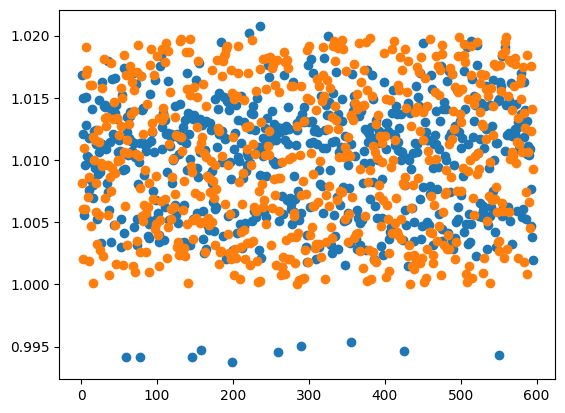

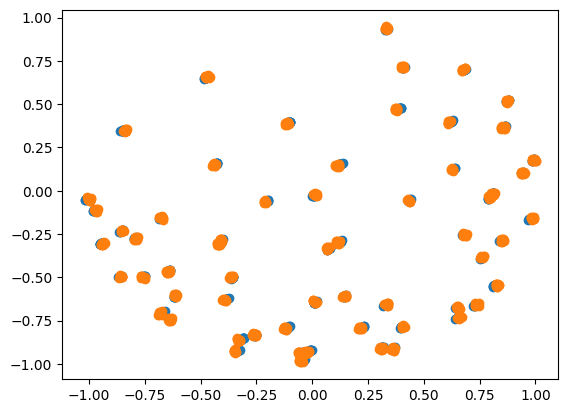

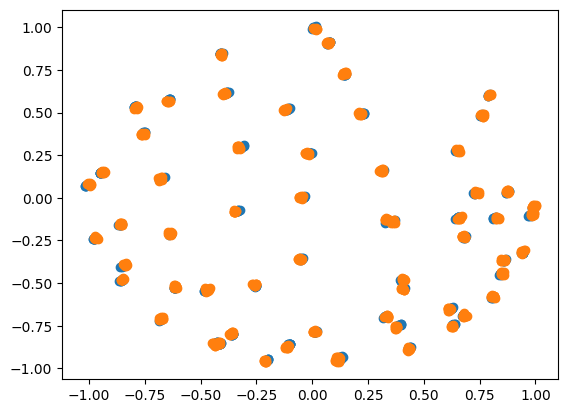

In [25]:
plt.figure(1)
plt.scatter(l,targets_pre[:,0])
plt.scatter(l,targets[:,0])
plt.figure(2)
plt.scatter(targets_pre[:,1],targets_pre[:,2])
plt.scatter(targets[:,1],targets[:,2])
plt.figure(3)
plt.scatter(targets_pre[:,1],targets_pre[:,3])
plt.scatter(targets[:,1],targets[:,3])

In [38]:
# validation sets results
targets=targets_val
targets_pre=model.predict(inputs_val)

combined_data=np.hstack((targets,targets_pre))
np.savetxt('polarvalidation_results.csv', combined_data, delimiter=',')
l=np.arange(start=1,stop=int((beta-alpha)*N)+1,step=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


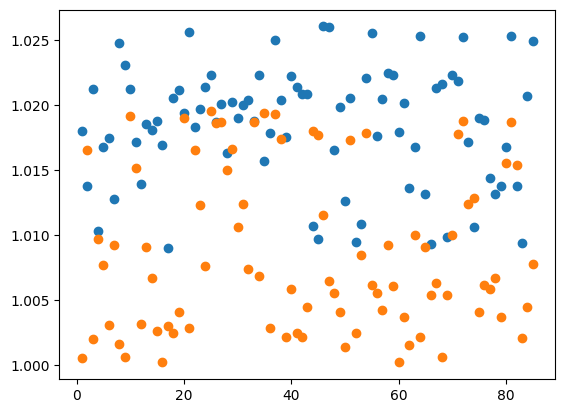

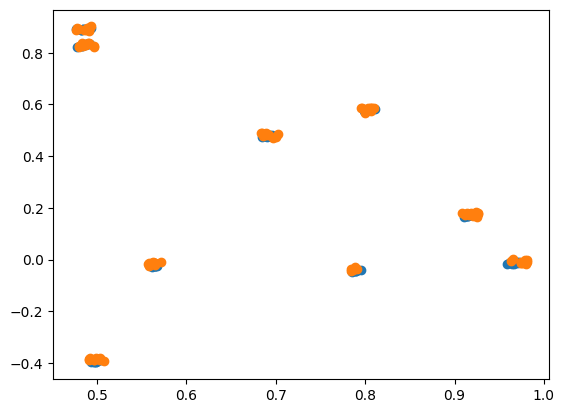

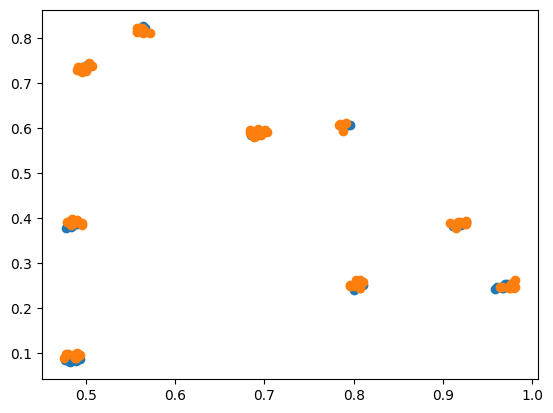

In [34]:
plt.figure(1)
plt.scatter(l,targets_pre[:,0])
plt.scatter(l,targets[:,0])
plt.figure(2)
plt.scatter(targets_pre[:,1],targets_pre[:,2])
plt.scatter(targets[:,1],targets[:,2])
plt.figure(3)
plt.scatter(targets_pre[:,1],targets_pre[:,3])
plt.scatter(targets[:,1],targets[:,3])

In [1]:
# Load the saved model
targets=targets_test
targets_pre=model.predict(inputs_test)
combined_data=np.hstack((targets,targets_pre))
# np.savetxt('polartest_results.csv', combined_data, delimiter=',')
l=np.arange(start=1,stop=int((1-beta)*N)+2,step=1)

NameError: name 'targets_test' is not defined

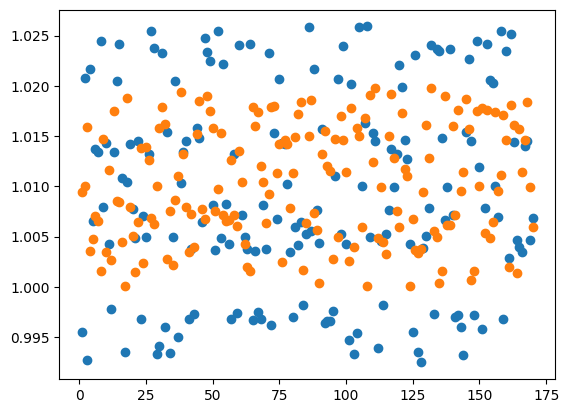

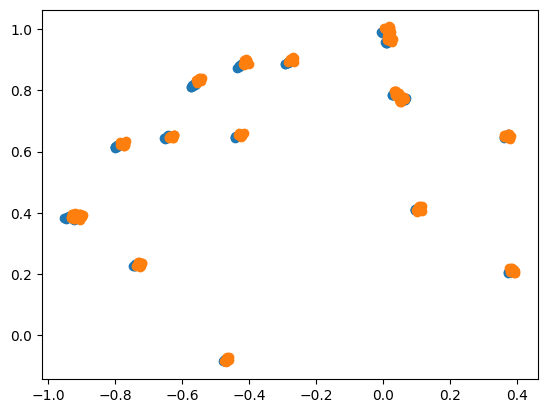

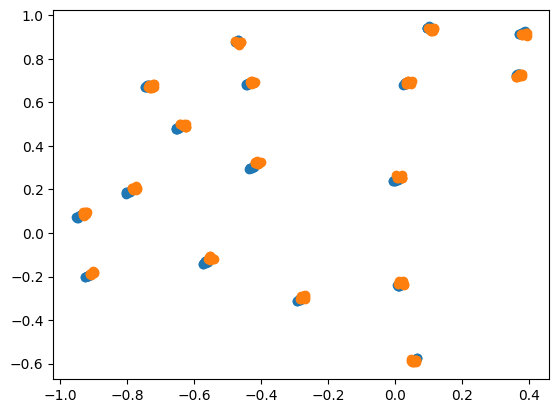

In [30]:
plt.figure(1)
plt.scatter(l,targets_pre[:,0])
plt.scatter(l,targets[:,0])
plt.figure(2)
plt.scatter(targets_pre[:,1],targets_pre[:,2])
plt.scatter(targets[:,1],targets[:,2])
plt.figure(3)
plt.scatter(targets_pre[:,1],targets_pre[:,3])
plt.scatter(targets[:,1],targets[:,3])

In [ ]:
# error
S0_pre, S1_pre, S2_pre, S3_pre = targets_pre[:, 0], targets_pre[:, 1], targets_pre[:, 2], targets_pre[:, 3]
S0_true, S1_true, S2_true, S3_true = targets[:, 0], targets[:, 1], targets[:, 2], targets[:, 3]

dops = np.sqrt(S1_true ** 2 + S2_true ** 2 + S3_true ** 2)
dopstest = np.sqrt(S1_pre ** 2 + S2_pre ** 2 + S3_pre ** 2)
sita = np.arccos((S1_true * S1_pre + S2_true * S2_pre + S3_true * S3_pre) / (dops * dopstest)) * 180 / np.pi
degree = np.sqrt(np.sum(sita ** 2) / len(sita))
print("RMS SOP角度误差:", degree)

RMS DOP误差: 0.00977555846091107
RMS SOP角度误差: 1.1685756021489635
